## Wavelet Morle with coordinate transform

In [47]:
import numpy
#from scipy import signal
import scipy.signal

import seaborn
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
# параметр sigma
sigma=0.7

In [49]:
# определение ф-ции Морле (real)
def morleyRE(t):
    m=real(exp(1j*pi*t)*exp(-t**2/(8.*sigma**2)))
    return m
    

In [50]:
# определение ф-ции Морле (Imag)
def morleyIM(t):
    m=imag(exp(1j*pi*t)*exp(-t**2/(8.*sigma**2)))
    return m

In [51]:
# детрендинг методом скользящего среднего. degree - окно усреднения
def detrendS(data,degree=10):
    detrended=[0.]*degree # заполняем нулями
    for i in range(degree,len(data)-degree):
        chunk=data[i-degree:i+degree]
        chunk=sum(chunk)/len(chunk)
        detrended.append(data[i]-chunk)
    return detrended+[0.]*degree

In [52]:
# имя файла для чтения данных
fnameR='AVD1976dayli_IRK.dat'
data=loadtxt(fnameR)
N=len(data[:,1])
foF2=zeros(N)
foF2[:]=data[:,1]

In [53]:
'''
f2mean=mean(data[:,1])
foF2sl=data[:,1]-f2mean
plot(foF2sl)
'''

'\nf2mean=mean(data[:,1])\nfoF2sl=data[:,1]-f2mean\nplot(foF2sl)\n'

In [54]:
# detrending by window smoothing

'''
foF2sl=detrend(foF2,'linear')

foF2sl=scipy.signal.detrend(foF2)
'''
dw=10 # semiwindow size
foF2sl=detrendS(foF2,15)
print(len(foF2sl))

121


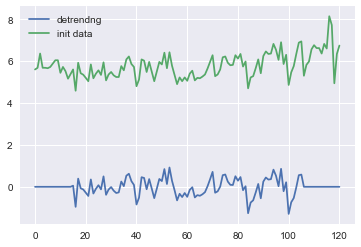

In [55]:
plot(foF2sl,label='detrendng')
plot(foF2,label='init data')
legend()

In [56]:
N2=int(N/6)
print(N2)
W=zeros(N2*N).reshape(N2,N)
Wim=zeros(N2*N).reshape(N2,N)
a=arange(1,N2+1)
b=arange(N)
t=arange(N)

20


### transform coordinat system (сжимаем/растягиваем шкалу времени

In [57]:
ty=t/float(N)*10.
by=b/float(N)*10.
ay=a/float(N)*10.
dt=ty[1]-ty[0]

In [58]:
for i in range(0,N2):
    #print(i)
    for jb in range(0,N):
        #print(jb)
        sum1=0.
        for k in range(0,N):
            sum1=sum1+foF2sl[k]*morleyRE((ty[k]-by[jb])/ay[i])*dt
        W[i,jb]=sum1/sqrt(ay[i])


In [59]:
for i in range(0,N2):
    #print(i)
    for jb in range(0,N):
        #print(jb)
        sum1=0.
        for k in range(0,N):
            sum1=sum1+foF2sl[k]*morleyIM((ty[k]-by[jb])/ay[i])*dt
        Wim[i,jb]=sum1/sqrt(ay[i])

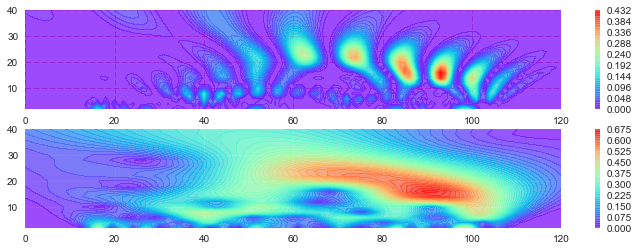

In [60]:
#
figure(figsize=(12,4))
subplot(2,1,1)
lev=arange(0.2,6.,0.05)
#contourf(b,a*2,W,levels=lev, cmap='RdGy',alpha=0.7)
lev=arange(0.1,14,0.05)
grid(color='r', linestyle='--', linewidth=0.5)
contourf(b,a*2,W**2,60, cmap='rainbow',alpha=0.7)
colorbar()
subplot(2,1,2)
contourf(b,a*2,sqrt(W**2+Wim**2),60, cmap='rainbow',alpha=0.7)
colorbar()
savefig('morley.png')

In [61]:
# LIM метод
WA = W**2
LIM = np.zeros(N2*N).reshape(N2,N)

#print(W)
for i in range(0,N2):
    S = np.mean(WA[i,:])
    #print(S)
    for j in range(0,N):
        LIM[i,j] = WA[i,j]/S

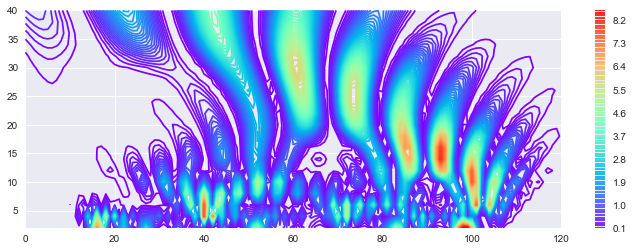

In [62]:
figure(figsize=(12,4))
scale=arange(0.5,12.,0.5)
contour(b,a*2,LIM, 90, cmap = cm.rainbow)
colorbar()

In [63]:
# Построчное заполнение массива рассчитанными данными
k = 0
dataW = zeros(3*N2*N).reshape(N2*N,3)    # Массив данных, для использования в Surfer
for i in range(0,N2):                  # Цикл для записси периодов коэффициентов FoF2
    for j in range(1,N):                 # Цикл для записи дней
        dataW[k,0] = b[j]                   # Дни
        dataW[k,1] = 2.*a[i]                # Периоды
        dataW[k,2] = LIM[i,j]            # Коэффиценты FoF2
        k = k+1                   
# запись в файл
fnameLIM="LIM_foF2_"+fnameR
savetxt(fnameLIM, dataW,fmt='%9.4e')

### Energy and ratio spectral energy

In [64]:
DE=zeros(N2*N).reshape(N2,N)
DEst=zeros(N2*N).reshape(N2,N)
DE=sqrt(W**2+Wim**2)
DEall=zeros(N)
for i in range(N):
    DEall[i]=sum(DE[:,i])
    DEst[:,i]=DE[:,i]/DEall[i]

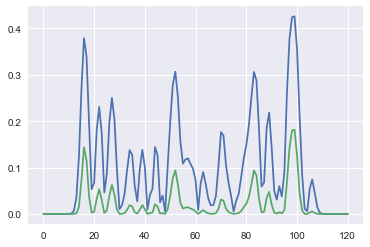

In [65]:
plot(DE[0,:])
plot(WA[0,:])

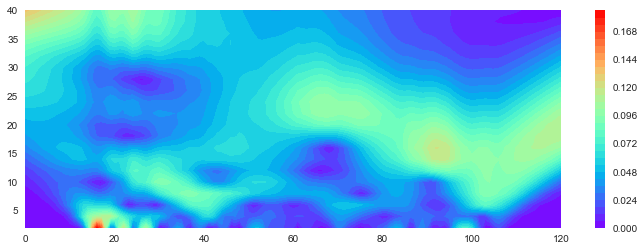

In [66]:
figure(figsize=(12,4))
scale=arange(0.5,12.,0.5)
contourf(b,2*a,DEst, 30, cmap = cm.rainbow)
colorbar()
savefig("Dest_foF2_"+fnameR+'.png')

In [67]:
# Построчное заполнение массива рассчитанными данными
k = 0
dataWe = zeros(3*N2*N).reshape(N2*N,3)    # Массив данных, для использования в Surfer
for i in range(0,N2):                  # Цикл для записси периодов коэффициентов FoF2
    for j in range(1,N):                 # Цикл для записи дней
        dataWe[k,0] = b[j]                   # Дни
        dataWe[k,1] = 2.*a[i]                # Периоды
        dataWe[k,2] = DEst[i,j]            # Коэффиценты FoF2
        k = k+1                   
# запись в файл
fnameDEst="Dest_foF2_"+fnameR
savetxt(fnameDEst, dataWe,fmt='%9.4e')